# Notes / Summary
1. ANNs are at the very core of deep learning. They are versatile, powerfule, and scalabel,\
 making them ideal to tackle large and highly complex machine leanring \
 tasks such as classifying billions of images e.g. google images.
 
2. ANNS, 1943, by neurophysiologist Warren McCulloch and mathematician Walter Pitts.
3. First paper "a logical calculus of Ideas Immanenet in Nervous Activity", presented a simplified \
computational model of how biological neurons might work together in animal brains tom perform complex \
computations using propositional logic,
4. This is the first artificial neural network architecture
5. The early success of ANN continued till 1960s, later ANN entered long winter, in 1980 revied due to\
 new architectures later 1990 advanced algorithms like SVM came and again ANN went on hold, noww in 2010\
  it came back again into picture.
6. ANN this time is different, bcz there is now a huge quantity of data avialble, and tremendous increase \
in computing power(moore's law) , and developments in new architecture's as well.

## Logical computations
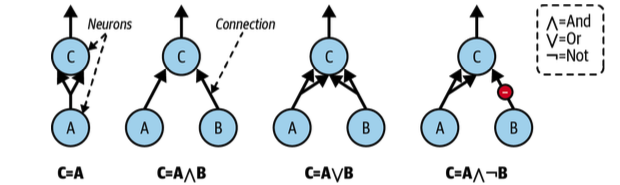

1. first network is identity netowrk
   
2. Second network is AND , both A and B should be high
3. Third network is OR, either A or B should be high
4. Fourth Network is, C will be high if A is high and B is low , this is more complex logical proposition

## The Perceptron
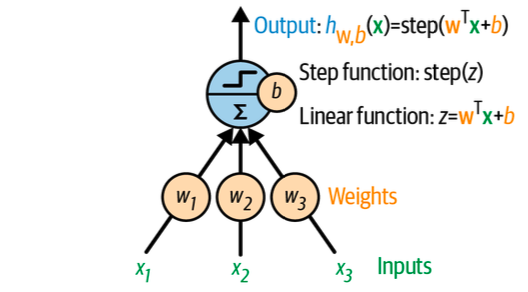

1. The Perceptron is one of the first and simplest ANN by Frank Rosenblatt in 1957
   
2. Also called as TLU-threshold logic unit
3. Also Linear Threshold unit - LTU
4. . It has multiple inputs associated with its own weights and a bias, just like in the linear regression equation
5. The summation is the fed to the step function similar to the sigmoid function in the logistic regression
6. the step function is a binary func, output is high if the above summation is >0 else output is 0
7. The step function if replaced with a sigmoid function then it becomes the logistic regression

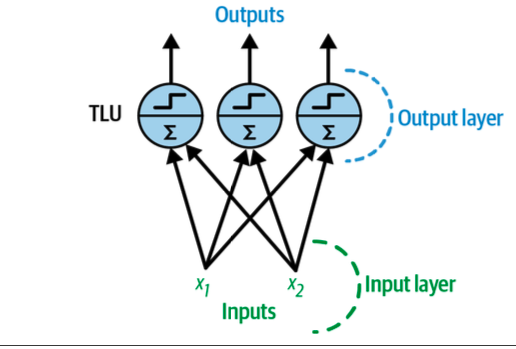

1. the outputs can be multiple classes in case of multi-class clasification
2. here if every TLU is conencted to every input from previous layer then it is \
called a fully connected layer as shown in above fig.

# Libraries

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

import tensorflow as tf

In [2]:
 
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Check for available GPUs
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     # Select the GPU you want to use (e.g., the first GPU)
#     try:
#         tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
#         logical_gpus = tf.config.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e, 'error')

# # Now you can use the GPU for your TensorFlow operations

# # Example: Create a tensor on the GPU
# with tf.device('/GPU:0'):  # Specify the GPU device (e.g., '/GPU:0' for the first GPU)
#     a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
#     print(a.device) 

In [4]:
RS = 143 # RANDOM STATE

# Perceptron

In [5]:
iris = load_iris(as_frame=True)
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
x = iris.data[['petal length (cm)','petal width (cm)']].values
y = iris.target == 0 ## only iris setosa

In [7]:
per_clfier = Perceptron(random_state=RS)
per_clfier.fit(x, y)

x_new = [[2,0.5], [3,1]] ## two flower data 
y_new = per_clfier.predict(x_new)
y_new ## predicts true or  false for two flowers data

array([ True, False])

* this perceptron learning algo. strongly resembles stochastic gradient descent\
in fact, scikit-learn's perceptron  class is equivalent to using a SGDClassifier\
with some default parameters 
1. with a simple perceptron, we can't learn the exculsive or / XOR function(classification prob)
   
2. this problem overcomed by stacking multiple layers of perceptron -  MLP
3. MLP is another new architecture in ANN

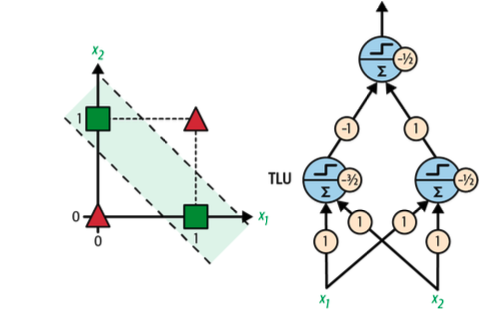

* use logistic regression classififer if you need outputs in probabilites
  
* since perceptron here give 1 or 0

# Multilayer perceptron and Backpropagation

*  The layers close to the input layer are usually called the lower \
    layers, and the ones close to the outputs are usually called the upper layers.


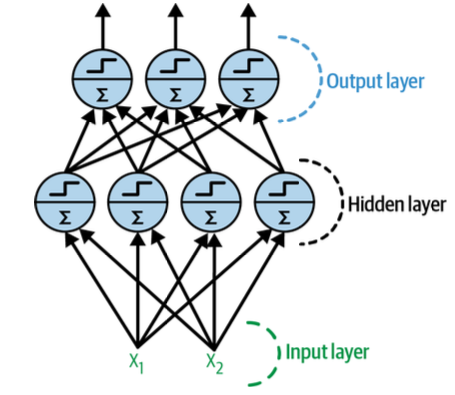

* The signal flows only in one direction (from the inputs to the \
outputs), so this architecture is an example of a **feedforward neural network (FNN).**

* When an ANN contains a deep stack of hidden layers it is called a **deep neural network (DNN).**
* combination of reverse-mode autodiff and gradient descent is now called **backpropagation**

* **chain rule**
*  **random initialization of the weights**
* It is important to initialize all the hidden layers’ connection weights\
randomly, or else training will fail.
* you randomly initialize the weights, you break \
the symmetry and allow backpropagation to train a diverse team of neurons.

* **Step** function was replaced by **Sigmoid** function in the recent years.
* This was essential because the step function contains only flat segments, so there is no gradient to work\
with (gradient descent cannot move on a flat surface), while the sigmoid function\
has a well-defined nonzero derivative everywhere, allowing gradient descent to make\
some progress at every step. 
* **Tan h function** / hyperbolic tangent function :
  * ranges from -1 to 1, S-shaped, continuous, and differentiable.
  * That range tends to make each layer’s output more or less centered around 0 \
     at the beginning of training, which often helps speed up convergence.
* **RELU** function - rectified linear unit function:
  * The ReLU function is continuous but unfortunately not differentiable at z = 0\
    (the slope changes abruptly, which can make gradient descent bounce around),\
    and its derivative is 0 for z < 0. In practice, however, it works very well and\
    has the advantage of being fast to compute, so it has become the default.11\
    Importantly, the fact that it does not have a maximum output value helps reduce\
    some issues during gradient descent

* Why do we need activation functions in the first place? Well, \
if you chain several linear transformations, all you get is a linear transformation. For\
example, if f(x) = 2x + 3 and g(x) = 5x – 1, then chaining these two linear functions\
gives you another linear function: f(g(x)) = 2(5x – 1) + 3 = 10x + 1. So if you don’t\
have some nonlinearity between layers, then even a deep stack of layers is equivalent\
to a single layer, and you can’t solve very complex problems with that.\

* Biological neurons seem to implement a **roughly sigmoid (S-shaped) activation function**, so researchers stuck\
to sigmoid functions for a very long time. But it turns out that ReLU generally works better in ANNs. This is\
one of the cases where the biological analogy was perhaps **misleading**.

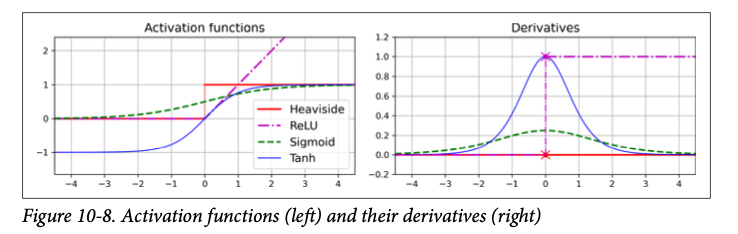

# Regression MLPs
* For multivariate regression (i.e., to \
    predict multiple values at once), you need one output neuron per output dimension. \
    For example, to locate the center of an object in an image, you need to predict 2D \
    coordinates, so you need **two output neurons. **
    
* **standardize** the input features before sending
them to the MLPRegressor. This is very important for neural networks because they\
are trained using gradient descent, **gradient** descent\
**does not converge very well** when the features have very different scales. 

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


housing =  fetch_california_housing()
x_train_full, x_test, y_train_full, y_test  = train_test_split(housing.data, housing.target, random_state=RS)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_full, y_train_full, random_state=RS
)

mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50,50,50], random_state=RS
)
pipeline = make_pipeline(
    StandardScaler(), mlp_reg
)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_valid)

rmse = mean_squared_error(y_valid, y_pred=y_pred)#, squared=False)
rmse

0.28201622689101985

* if you want to guarantee
that the output will always be positive, then you should use the ReLU activation\
function in the output layer, or the softplus activation function, which is a smooth\
variant of ReLU: softplus(z) = log(1 + exp(z)). 

*  MLPRegressor : uses the mean squared error, which is usually what you want\
for regression, but if you have a lot of outliers in the training set, you may prefer to\
use the mean absolute error instead

* 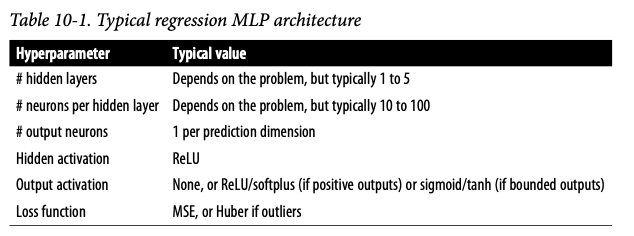

# Classification MLPs
* for binary classificaiton problem, need a single output neuron using the sigmoid activation function
* 
* MLPs also can easily handle **multilable binary classsification**tasks, 
  * you need two output neurons, both using the sigmoid activation function, 
  * first output neuron for spam or not , second is for urgnet or not
* if **multi class classification**, you should use the softmax activation function for the\
whole output layer. The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they\
add up to 1, since the classes are exclusive
* Cross entropy loss is generally a good choice

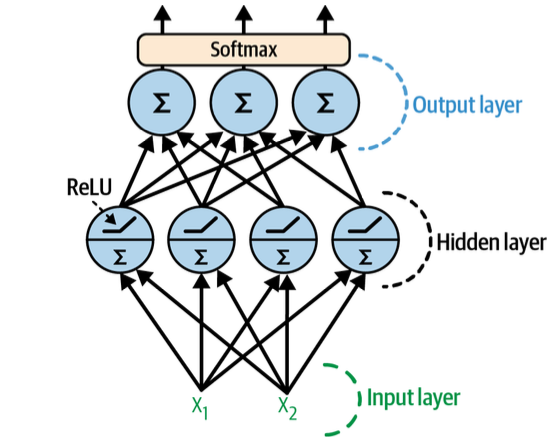

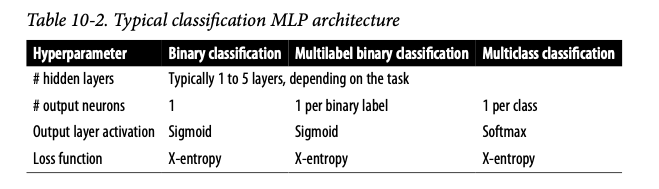

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


housing =  fetch_california_housing()
x_train_full, x_test, y_train_full, y_test  = train_test_split(housing.data, housing.target, random_state=RS)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_full, y_train_full, random_state=RS
)

mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50,50,50], random_state=RS
)
pipeline = make_pipeline(
    StandardScaler(), mlp_reg
)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_valid)

rmse = mean_squared_error(y_valid, y_pred=y_pred)#, squared=False)
rmse

0.28201622689101985

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.datasets import load_iris

iris_data = load_iris()
x_train_full, x_test, y_train_full, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=RS)

x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=RS)


mlp_clasfr = MLPClassifier(
    hidden_layer_sizes=[10], random_state=RS
)
pipeline = make_pipeline(
    StandardScaler(), mlp_clasfr
)

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_valid)
y_pred

# logloss = log_loss(y_valid, y_pred)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1,
       1, 0])

# Implementing MLPs with Keras

* **Keras is TensorFlow’s **high-level deep learning API:

* released in March 2015
* When loading **MNIST or Fashion MNIST** using Keras rather than Scikit-Learn, one\
important difference is that every image is represented as a 28 × 28 array rather than\
a 1D array of size 784. 
* a **Sequential model.** This is the simplest kind of Keras\
model for neural networks that are just composed of a single stack of layers\
connected sequentially. This is called the sequential API.
* Finally, we add a Dense output layer with 10 neurons (one per class), using the\
    **softmax activation** function because the classes are exclusive.
* Specifying activation="relu" is equivalent to specifying activation=tf.keras.activations.relu.

In [11]:
import tensorflow as tf 

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist
x_train, y_train = x_train_full[:-5000], y_train_full[:-5000]
x_valid, y_valid = x_train_full[-5000:], y_train_full[-5000:]
x_train.shape

(55000, 28, 28)

In [12]:
x_train.dtype

dtype('uint8')

In [13]:
##For simplicity, scale pixel intensities down to the 0-1 range by dividng them bny 255
x_train, x_valid, x_test = x_train/255, x_valid/255, x_test/255


In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

In [15]:
tf.random.set_seed(RS)
model  = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


2025-01-02 21:46:57.766312: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-01-02 21:46:57.766386: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-01-02 21:46:57.766403: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-01-02 21:46:57.766619: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-02 21:46:57.766639: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## summary

In [16]:
## inplace of above , we can pass a list of layers as below

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)  
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Dense layers often have a lot of parameters. For example, the first hidden\
layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to\
235,500 parameters! This gives the model quite a lot of flexibility to fit the training\
data, but it also means that the model runs the risk of overfitting, especially when you\
do not have a lot of training data.

* All global state managed by Keras is stored in a Keras session,\
which you can clear using tf.keras.backend.clear_session().\
In particular, this resets the name counters.
* Dense layer initialized weights randomly, 
  * if you want to use a different initialization method, you can set
kernel_initializer

In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]
hidden1

In [19]:
# model.get_layer('dense_3') is hidden1

In [20]:
weights, biases = hidden1.get_weights()
weights

array([[-0.02556284,  0.06041658,  0.05650409, ...,  0.04013768,
        -0.06938434, -0.02501438],
       [ 0.07353295, -0.01287749, -0.05924548, ..., -0.05932305,
        -0.03106361,  0.05468802],
       [-0.01875801, -0.03071435,  0.07389431, ..., -0.07429837,
        -0.0165753 ,  0.02667775],
       ...,
       [-0.02155768,  0.04819346, -0.04880544, ...,  0.03607702,
         0.01352398,  0.03554765],
       [ 0.07314584, -0.02944063, -0.03193105, ...,  0.05644801,
         0.00891501,  0.03432699],
       [-0.03242819,  0.03921042,  0.00927161, ..., -0.00202759,
         0.06337647,  0.01878957]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

## compiling the model"

In [24]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

## training and evaluating the model

In [25]:
history = model.fit(
    x_train, y_train, epochs=30,
    validation_data=(x_valid, y_valid)
)
history

Epoch 1/30
   1/1719 [..............................] - ETA: 7:32 - loss: 2.4588 - accuracy: 0.1250

2025-01-02 21:46:58.667017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7255 - accuracy: 0.7542

2025-01-02 21:47:05.143588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.7255 - accuracy: 0.7542 - val_loss: 0.5534 - val_accuracy: 0.8048
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5170 - accuracy: 0.8214 - val_loss: 0.5040 - val_accuracy: 0.8204
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4773 - accuracy: 0.8326 - val_loss: 0.4624 - val_accuracy: 0.8394
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4597 - accuracy: 0.8407 - val_loss: 0.4476 - val_accuracy: 0.8450
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4481 - accuracy: 0.8436 - val_loss: 0.4395 - val_accuracy: 0.8482
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4392 - accuracy: 0.8478 - val_loss: 0.4269 - val_accuracy: 0.8466
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4345 - accuracy: 0.8493 - val_loss: 0.4314 - val_accuracy: 0.8460
Epo

In [26]:
history